In [16]:
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
from scipy.spatial.distance import cosine
from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity
le = preprocessing.LabelEncoder()

In [17]:
iris_data = pd.read_csv('iris/iris.csv')

In [18]:
iris_data.columns.values
iris_data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
iris_data['class'] = le.fit_transform(iris_data['class'])

In [20]:
X = iris_data.iloc[:,[0,1,2,3,4]].values


In [21]:
Y = iris_data.iloc[:,[4]].values
Y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

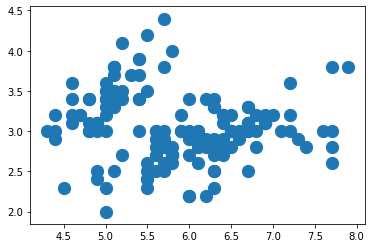

In [22]:
plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

In [23]:
# cosine distance 
def cosine_distance(p1, p2):
    return distance.cosine(p1,p2)

In [24]:
# Euclidean distance
def Euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [25]:
# Jaccard distance
def Jaccard_distance(point1, point2):
    num = 0
    den = 0
    for i in range(len(point1)):
        num = num + min(point1[i],point2[i])
        den = den + max(point1[i],point2[i])
    dist = 1 - num/den
    return dist

In [26]:
# SSE formula
def SSE(point1,point2):
    squared_error = (point1 - point2) **2
    return np.sum(squared_error)  

In [69]:
#K-means implementation
def KMean(data,distance):
    centroids = {}
    Euc_itr = 0
    Cos_itr = 0 
    Jacc_itr = 0
    
    # Initialising centroids K is equal to 3
    for i in range(3):
        centroids[i] = data[i][0:4]
    
    classes = {}
    target = {}
    current_SSE = 0
    Prev_SSE = 0
    itre = True
    itr = 0
    while(itre):
        itr = itr+1
        if(distance == Euclidean_distance):
            Euc_itr = Euc_itr + 1
        if(distance == cosine_distance):
            Cos_itr = Cos_itr + 1
        if(distance == Jaccard_distance):
            Jacc_itr = Jacc_itr + 1
    
        classes = {}
        target = {}
        label = []
        for classKey in range(3):
            classes[classKey] = []
            target[classKey] = []
    
        for dataPoint in data: 
            Distance = []
            for centroid in centroids:
                if(distance == Euclidean_distance):
                    dis = Euclidean_distance(dataPoint[0:4], centroids[centroid])
                    Distance.append(dis)
                if(distance == cosine_distance):
                    dis = cosine_distance(dataPoint[0:4], centroids[centroid])
                    Distance.append(dis)
                if(distance == Jaccard_distance):
                    dis = Jaccard_distance(dataPoint[0:4], centroids[centroid])
                    Distance.append(dis)

            minDis = min(Distance)
            minDisIndex = Distance.index(minDis)
            classes[minDisIndex].append(dataPoint[0:4])
            target[minDisIndex].append(dataPoint[4])
        
            
           
        oldCentroid = dict(centroids)
        
        SSE_class0 = 0
        SSE_class1 = 0 
        SSE_class2 = 0

        for i in range(len(classes[0])):
            SSE_class0 = SSE_class0 + SSE(classes[0][i],centroids[0])
        for i in range(len(classes[1])):
            SSE_class1 = SSE_class1 + SSE(classes[1][i],centroids[1])
        for i in range(len(classes[2])):
            SSE_class2 = SSE_class2 + SSE(classes[2][i],centroids[2])
        current_SSE = SSE_class0 + SSE_class1 + SSE_class2
        print("Iteration",itr)
        print("Current SSE",current_SSE)
        print("Previous SSE",Prev_SSE)
        
        if(current_SSE <= Prev_SSE):
            itre = True
        if(current_SSE >= Prev_SSE):
            itre = False
        if(itr == 1):
            itre = True

        Prev_SSE = current_SSE
        
       
    
    # calculating new centroids
        for classKey in classes:
            classData = classes[classKey]
            NewCentroid = np.mean(classData, axis = 0)
            centroids[classKey] = NewCentroid


        for centroid in oldCentroid:
            oldCent = oldCentroid[centroid]
            curr = centroids[centroid]


    
    # Calculating Accuracies
    label = {}
    correctclass = 0
    for targetKey in target:
        label[targetKey] = []
        count0 = 0
        count1 = 0
        count2 = 0
        for i in range(len(target[targetKey])):
            if(target[targetKey][i] == 1.0):
                count1 = count1+1
            if(target[targetKey][i] == 2.0):
                count2 = count2+1
            if(target[targetKey][i] == 0.0):
                count0 =count0+1
        print("Count of 0,1,2 classes in", targetKey, "cluster :" , count0,count1,count2)
        if(count0 == max(count0,count1,count2)):
            label[targetKey].append(0)
            correctclass = correctclass+ count0
        elif(count1 == max(count0,count1,count2)):
            label[targetKey].append(1)
            correctclass = correctclass+ count1
        elif(count2 == max(count0,count1,count2)):
            label[targetKey].append(2)
            correctclass = correctclass+ count2
                    
        print("Predicted class values in ",targetKey, " cluster :", target[targetKey])
    print("Labels",label)
    Accuracy =   correctclass/150 * 100;
    print("Accuracy",Accuracy)
    print("E_ITR",Euc_itr)
    print("C_ITR",Cos_itr)
    print("J_ITR",Jacc_itr)
    return centroids, classes

In [70]:
centroids, classes = KMean(X,Euclidean_distance)

Iteration 1
Current SSE 1755.190000000001
Previous SSE 0
Iteration 2
Current SSE 244.54604885954535
Previous SSE 1755.190000000001
Iteration 3
Current SSE 87.84033914272501
Previous SSE 244.54604885954535
Iteration 4
Current SSE 85.04157943238867
Previous SSE 87.84033914272501
Iteration 5
Current SSE 84.10217888865152
Previous SSE 85.04157943238867
Iteration 6
Current SSE 83.13638186876976
Previous SSE 84.10217888865152
Iteration 7
Current SSE 81.83900206772623
Previous SSE 83.13638186876976
Iteration 8
Current SSE 80.89577600000003
Previous SSE 81.83900206772623
Iteration 9
Current SSE 79.96297983461304
Previous SSE 80.89577600000003
Iteration 10
Current SSE 79.43376414532675
Previous SSE 79.96297983461304
Iteration 11
Current SSE 79.01070972222223
Previous SSE 79.43376414532675
Iteration 12
Current SSE 78.94506582597731
Previous SSE 79.01070972222223
Iteration 13
Current SSE 78.94506582597731
Previous SSE 78.94506582597731
Count of 0,1,2 classes in 0 cluster : 0 3 36
Predicted class 

In [71]:
#Euclidean centroids
centroids,classes

({0: array([6.85384615, 3.07692308, 5.71538462, 2.05384615]),
  1: array([5.88360656, 2.74098361, 4.38852459, 1.43442623]),
  2: array([5.006, 3.418, 1.464, 0.244])},
 {0: [array([7. , 3.2, 4.7, 1.4]),
   array([6.9, 3.1, 4.9, 1.5]),
   array([6.7, 3. , 5. , 1.7]),
   array([6.3, 3.3, 6. , 2.5]),
   array([7.1, 3. , 5.9, 2.1]),
   array([6.3, 2.9, 5.6, 1.8]),
   array([6.5, 3. , 5.8, 2.2]),
   array([7.6, 3. , 6.6, 2.1]),
   array([7.3, 2.9, 6.3, 1.8]),
   array([6.7, 2.5, 5.8, 1.8]),
   array([7.2, 3.6, 6.1, 2.5]),
   array([6.5, 3.2, 5.1, 2. ]),
   array([6.4, 2.7, 5.3, 1.9]),
   array([6.8, 3. , 5.5, 2.1]),
   array([6.4, 3.2, 5.3, 2.3]),
   array([6.5, 3. , 5.5, 1.8]),
   array([7.7, 3.8, 6.7, 2.2]),
   array([7.7, 2.6, 6.9, 2.3]),
   array([6.9, 3.2, 5.7, 2.3]),
   array([7.7, 2.8, 6.7, 2. ]),
   array([6.7, 3.3, 5.7, 2.1]),
   array([7.2, 3.2, 6. , 1.8]),
   array([6.4, 2.8, 5.6, 2.1]),
   array([7.2, 3. , 5.8, 1.6]),
   array([7.4, 2.8, 6.1, 1.9]),
   array([7.9, 3.8, 6.4, 2. ])

In [72]:
Cos_centroids, Cos_classes = KMean(X, cosine_distance)

Iteration 1
Current SSE 1790.4599999999994
Previous SSE 0
Iteration 2
Current SSE 170.97680380597478
Previous SSE 1790.4599999999994
Iteration 3
Current SSE 152.3969571050643
Previous SSE 170.97680380597478
Iteration 4
Current SSE 152.3121029411765
Previous SSE 152.3969571050643
Iteration 5
Current SSE 152.3121029411765
Previous SSE 152.3121029411765
Count of 0,1,2 classes in 0 cluster : 16 0 0
Predicted class values in  0  cluster : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Count of 0,1,2 classes in 1 cluster : 0 50 50
Predicted class values in  1  cluster : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,

In [73]:
#cosine centroids and cluster data points
Cos_centroids, Cos_classes

({0: array([5.09375, 3.7375 , 1.3875 , 0.25625]),
  1: array([6.262, 2.872, 4.906, 1.676]),
  2: array([4.96470588, 3.26764706, 1.5       , 0.23823529])},
 {0: [array([5. , 3.6, 1.4, 0.2]),
   array([5.4, 3.9, 1.7, 0.4]),
   array([4.6, 3.4, 1.4, 0.3]),
   array([4.3, 3. , 1.1, 0.1]),
   array([5.8, 4. , 1.2, 0.2]),
   array([5.7, 4.4, 1.5, 0.4]),
   array([5.4, 3.9, 1.3, 0.4]),
   array([5.1, 3.8, 1.5, 0.3]),
   array([5.1, 3.7, 1.5, 0.4]),
   array([4.6, 3.6, 1. , 0.2]),
   array([5.2, 4.1, 1.5, 0.1]),
   array([5.5, 4.2, 1.4, 0.2]),
   array([5. , 3.5, 1.3, 0.3]),
   array([4.4, 3.2, 1.3, 0.2]),
   array([5.1, 3.8, 1.6, 0.2]),
   array([5.3, 3.7, 1.5, 0.2])],
  1: [array([7. , 3.2, 4.7, 1.4]),
   array([6.4, 3.2, 4.5, 1.5]),
   array([6.9, 3.1, 4.9, 1.5]),
   array([5.5, 2.3, 4. , 1.3]),
   array([6.5, 2.8, 4.6, 1.5]),
   array([5.7, 2.8, 4.5, 1.3]),
   array([6.3, 3.3, 4.7, 1.6]),
   array([4.9, 2.4, 3.3, 1. ]),
   array([6.6, 2.9, 4.6, 1.3]),
   array([5.2, 2.7, 3.9, 1.4]),
   arr

In [74]:
Jaccard_centroids, Jaccard_classes = KMean(X, Jaccard_distance)

Iteration 1
Current SSE 1765.68
Previous SSE 0
Iteration 2
Current SSE 209.3251003424783
Previous SSE 1765.68
Iteration 3
Current SSE 115.23746149584488
Previous SSE 209.3251003424783
Iteration 4
Current SSE 95.04706622131168
Previous SSE 115.23746149584488
Iteration 5
Current SSE 88.6499723133977
Previous SSE 95.04706622131168
Iteration 6
Current SSE 85.95814853829927
Previous SSE 88.6499723133977
Iteration 7
Current SSE 84.80172984452899
Previous SSE 85.95814853829927
Iteration 8
Current SSE 84.38502533134351
Previous SSE 84.80172984452899
Iteration 9
Current SSE 84.33228455008494
Previous SSE 84.38502533134351
Iteration 10
Current SSE 84.33228455008494
Previous SSE 84.33228455008494
Count of 0,1,2 classes in 0 cluster : 0 36 2
Predicted class values in  0  cluster : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0]
Count of 0,1,2 classes in 1 c

In [75]:
# Jaccard centrtoids and classes
Jaccard_centroids,Jaccard_classes

({0: array([5.69210526, 2.66578947, 4.11578947, 1.27368421]),
  1: array([6.61129032, 2.9983871 , 5.39032258, 1.92258065]),
  2: array([5.006, 3.418, 1.464, 0.244])},
 {0: [array([5.5, 2.3, 4. , 1.3]),
   array([5.7, 2.8, 4.5, 1.3]),
   array([4.9, 2.4, 3.3, 1. ]),
   array([5.2, 2.7, 3.9, 1.4]),
   array([5. , 2. , 3.5, 1. ]),
   array([5.9, 3. , 4.2, 1.5]),
   array([6. , 2.2, 4. , 1. ]),
   array([6.1, 2.9, 4.7, 1.4]),
   array([5.6, 2.9, 3.6, 1.3]),
   array([5.6, 3. , 4.5, 1.5]),
   array([5.8, 2.7, 4.1, 1. ]),
   array([6.2, 2.2, 4.5, 1.5]),
   array([5.6, 2.5, 3.9, 1.1]),
   array([6.1, 2.8, 4. , 1.3]),
   array([6.1, 2.8, 4.7, 1.2]),
   array([6.4, 2.9, 4.3, 1.3]),
   array([6. , 2.9, 4.5, 1.5]),
   array([5.7, 2.6, 3.5, 1. ]),
   array([5.5, 2.4, 3.8, 1.1]),
   array([5.5, 2.4, 3.7, 1. ]),
   array([5.8, 2.7, 3.9, 1.2]),
   array([5.4, 3. , 4.5, 1.5]),
   array([6. , 3.4, 4.5, 1.6]),
   array([6.3, 2.3, 4.4, 1.3]),
   array([5.6, 3. , 4.1, 1.3]),
   array([5.5, 2.5, 4. , 1.3])